In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

# Bearing Failures occur Uniformly between 800 and 2000 days

In [6]:
np.random.randint(800,2000)

1198

In [8]:
fail1 = np.random.randint(800,2000)
fail2 = np.random.randint(800,2000)
print(fail1, fail2)

1462 1184


# Now let's define a function that calculates days until "RED" state


In [9]:
def days_until_red():

    fail1 = np.random.randint(800,2000)
    fail2 = np.random.randint(800,2000)
    return(max(fail1, fail2))

In [28]:
days_until_red() 

1293

In [15]:
results = [days_until_red() for x in range(1000)]

In [20]:
len(results)

1000

In [30]:
np.mean(results)

1594.1130000000001

# Toss 2 coins at the same time

(array([  1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          1.,   1.,   1.,   0.,   0.,   1.,   1.,   0.,   2.,   0.,   2.,
          1.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   1.,   0.,
          0.,   0.,   4.,   0.,   0.,   0.,   2.,   1.,   0.,   1.,   1.,
          1.,   1.,   4.,   1.,   0.,   0.,   2.,   0.,   4.,   0.,   0.,
          1.,   0.,   1.,   2.,   0.,   1.,   0.,   3.,   2.,   2.,   0.,
          2.,   6.,   3.,   2.,   0.,   1.,   1.,   1.,   1.,   2.,   1.,
          2.,   0.,   3.,   2.,   1.,   2.,   1.,   0.,   1.,   1.,   1.,
          2.,   3.,   0.,   1.,   1.,   4.,   2.,   2.,   0.,   2.,   6.,
          5.,   0.,   2.,   1.,   0.,   0.,   1.,   3.,   2.,   1.,   1.,
          0.,   2.,   2.,   1.,   3.,   1.,   1.,   0.,   2.,   3.,   1.,
          2.,   1.,   4.,   1.,   4., 

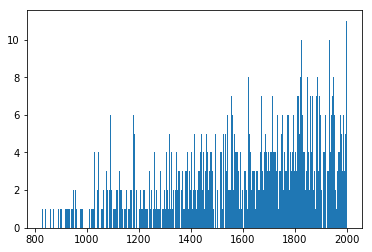

In [29]:
plt.hist(results, bins=400)

## Toss k coins at the same time


In [25]:
def toss_k(k):
    return [toss() for x in range(k)]

In [32]:
print(toss_k(4))

[1, 0, 0, 1]


# Toss K coins, return Number of Heads

We are not interested in what happended to each of the k coins. We just want to know the total number of heads

In [35]:
def heads_for_k_cointoss(k):
    '''
    Return the total number of heads, from tossing k coins
    '''
    return sum(toss_k(k))

In [52]:
heads_for_k_cointoss(10)

5

# Why are we not getting 5 heads from 10 tosses every time?

Answer: Because this works only in the Average. Not every time.

One typical thing to do is to create a **histogram** of the #heads from (say) 10 tosses.

This will give us an idea of the **DISTRIBUTION** of the number of heads from k=10 tosses.

How to do this?

- Step 1: You toss 10 coins once, record number of heads
- Step 2: Do the same thing, a 1000 times. (Called "replications")
- Step 3: Note down the results.
- Step 4: Plot the results


In [55]:
results = []
for rep in range(1000):
    num_heads = heads_for_k_cointoss(10)
    results.append(num_heads)

In [63]:
import matplotlib.pyplot as plt

In [60]:
% matplotlib inline

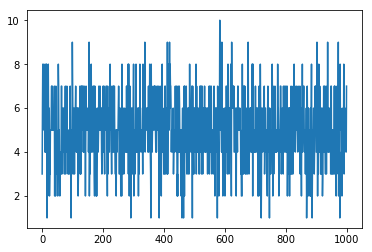

In [62]:
plt.plot(results)

## That didn't go as planned!

What is the problem?

We need a **HISTOGRAM**, not a simple plot

(array([  14.,   51.,  103.,  213.,  242.,  207.,  121.,   37.,   11.,    1.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

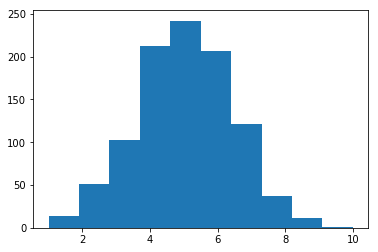

In [64]:
plt.hist(results)

# Probabilistic Experiments…

• Toss 5 coins.

## Question: What are the chances that you will get >= 4 heads?


# Let's discuss this. How should we approach this?

In [95]:
results2 = [heads_for_k_cointoss(5) for x in range(10000)]

### Next task to see how many of the entries inside the list called "results2" have a value of >=4

In [102]:
# Using Pandas

res_df = pd.DataFrame({'Heads': results2})

In [103]:
res_df['Heads'] >= 4

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7        True
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15       True
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
9970    False
9971    False
9972    False
9973    False
9974    False
9975    False
9976    False
9977    False
9978    False
9979    False
9980     True
9981     True
9982    False
9983     True
9984     True
9985    False
9986    False
9987    False
9988    False
9989    False
9990     True
9991    False
9992    False
9993    False
9994     True
9995     True
9996    False
9997    False
9998    False
9999    False
Name: Heads, dtype: bool

In [104]:
sum(res_df['Heads'] >= 4)

1900

# Can also be done using numpy and conditions

In [105]:
np_res = np.array(results2) # store it as a numpy array

In [106]:
cond = np_res >=4
np_res[cond] # keep only elements that satisfy the condition

array([4, 4, 4, ..., 4, 4, 4])

But we want to know how many of these elements satisfy the condition (>=4)

In [101]:
len(np_res[cond])

1900

# Homework challenge

### Find the fraction of Instances when >=4 heads occurred in a row!